In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)
plt.style.use('ggplot')
pd.__version__

'1.2.4'

## Data

In [2]:
# Load 248 days of step data and vivofit goals
data = pd.read_csv('data\garmin-vivofit.csv', index_col='date')
data.head()

           steps  goal  Unnamed: 3  Unnamed: 4
date                                          
4/25/2014   9936  4994         NaN         NaN
4/26/2014   7465  5294         NaN         NaN
4/27/2014   9437  5610         NaN         NaN
4/28/2014   8368  5946         NaN         NaN
4/29/2014  10254  6302         NaN         NaN

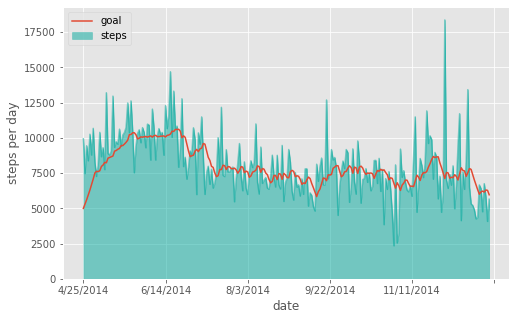

In [3]:
# Plot the steps and goal data
data.steps.plot(kind='area', figsize=(8,5), color='#00A99D', alpha=.5)
data.goal.plot()
plt.ylabel('steps per day')
plt.legend(loc='upper left')

## Calculate the mean
The arithmetic mean is the most commonly used measure of central tendency. The Greek letter $\mu$ (mu) is used to represent the population mean. To calculate the mean, we sum up all values $x_0+x_1+x_n$ and divide it by the number of values $n$.

$$\mu= \frac{1}{n}\sum_{i=0}^n x_i$$


In [4]:
# Calculate the mean
x, n = 0.0, 0

for number_of_steps in data.steps:
    x += number_of_steps

n = len(data.steps)

mean = x / n
mean

8059.6532258064517

In [5]:
# We can also let pandas use NumPy's mean function to do the job
data.steps.mean()

8059.6532258064517

In [6]:
# Or we can call NumPy's mean function ourselves
np.mean(data.steps)

8059.6532258064517

In [7]:
# Use pandas to get the mean for all columns at ones
data.mean()

steps    8059.653226
goal     7932.141129
dtype: float64

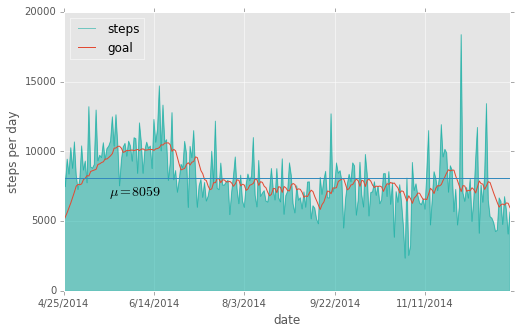

In [8]:
# Plot the mean, togehter with the steps and goal data
data.steps.plot(kind='area', color='#00A99D', alpha=.5, figsize=(8,5))
data.goal.plot(legend=True)
plt.plot([0, len(data.steps)],[mean, mean])
plt.ylabel('steps per day')
plt.text(25, mean-1200, r'$\mu=' + str(int(math.floor(mean))) + '$', fontsize=14)
plt.legend(loc='upper left')

## Calculate the median
The median is often a better measure of central tendency when we have extreme outliers. The median is the value in the middle after we sort the data. This is why outliers do not influence the median as much as they do the mean. If the number of observations $n$ is even, we have to take the mean of the two middle values. We calculate for a zero based index.


$$n\ is\ odd:\ \ x_{median}=x_{\frac{n-1}{2}}$$

$$n\ is\ even:\ \ x_{median}=\frac{x_\frac{n-2}{2}+x_\frac{n}{2}}{2}$$


In [9]:
median, n = 0.0, 0

# Get the number of observations
n = len(data.steps)
    
# order the data
ordered_data = data.steps.sort_values()

if n % 2 == 0:
    # n is even
    m1 = ordered_data.iloc[int((n - 2) / 2)]
    m2 = ordered_data.iloc[int((n / 2))]
    median = (m1 + m2) / 2.0
else:
    # n is odd
    median = ordered_data.iloc[int((n - 1) / 2.0)]

median

7810.0

In [10]:
# Again, we can let pandas use NumPy's median function to do the job
data.steps.median()

7810.0

In [11]:
# Or we can call NumPy's median function ourselves
np.median(data.steps)

7810.0

In [12]:
# Use pandas to get the median for all columns at ones
data.median()

steps    7810.0
goal     7619.5
dtype: float64

## Calculate the Mode
The mode is one or more values which occur most often in the series. This measure of central tendency is especially meaningful when you have a lot of repeated data points (like five-star ratings, day numbers). For the Garmin Vivofit data, however, this holds a problem, because we seldom have the same step count on a particular day. In that case we could categorize our data into range buckets, like 0-1000, 1000-2000 steps, and count the frequencies of the observations in the buckets. Choosing the right bucket size can be tricky, because we can obscure the data or miss the 'real' mode.

Mode: 7000 with bucket size 1000


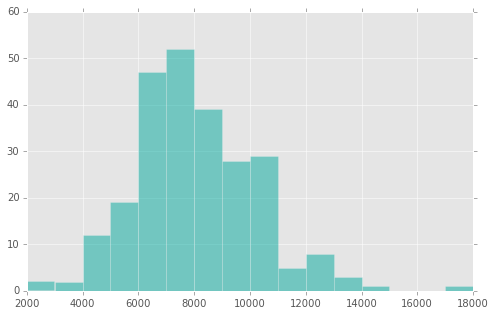

In [13]:
# Let's create a lambda that assigns a bucket of size 1000 steps
# to each of the step count in the data set
bucket_size = 1000
bucket_calculator = lambda x: int(x) / bucket_size * bucket_size

data['bucket'] = data.steps.apply(bucket_calculator)
bucket_min = data.bucket.min()
bucket_max = data.bucket.max()
bins = int((bucket_max-bucket_min)/bucket_size)

data.bucket.hist(color='#00A99D', alpha=.5, bins=bins, figsize=(8,5))

print('Mode:', data.groupby('bucket').steps.count().idxmax(), \
      'with bucket size', bucket_size)